In [1]:
import pandas as pd

In [2]:
df_fall = pd.read_csv('mdata/fall.csv')
df_fall['target'] = 1
df_sitting = pd.read_csv('mdata/sitting.csv')
df_sitting['target'] = 0
df_stand = pd.read_csv('mdata/stand.csv')
df_stand['target'] = 0

In [3]:
fdata = pd.concat([df_fall, df_sitting, df_stand], axis=0)

In [4]:
fdata

,x0,y0,score0,x1,y1,score1,x2,y2,score2,x3,...,x15,y15,score15,x16,y16,score16,x17,y17,score17,target
0,0.000000,0.000000,0.337205,0.033681,-0.041667,0.479812,0.039931,-3.750000e-02,0.470078,0.055556,...,0.000000,0.000000,0.337205,0.049306,-0.037500,0.112311,0.000000,0.000000,0.337205,1
1,0.050000,-0.007639,0.257413,0.009375,0.042361,0.332611,0.000000,0.000000e+00,0.205765,0.000000,...,0.046875,-0.011806,0.149701,0.000000,0.000000,0.205765,0.043750,0.013194,0.211643,1
2,0.012500,0.070833,0.316636,-0.018750,0.025000,0.397123,-0.003125,-3.750000e-02,0.071235,-0.034375,...,0.000000,0.000000,0.287185,0.025000,0.041667,0.481964,0.000000,0.000000,0.287185,1
3,-0.092773,-0.013802,0.786730,-0.083398,0.065365,0.569318,-0.089648,9.453125e-02,0.336498,-0.033398,...,-0.099023,-0.022135,0.279194,-0.133398,0.027865,0.675597,0.000000,0.000000,0.471914,1
4,-0.109722,0.041204,0.670537,-0.056597,0.049537,0.553996,-0.059722,1.245370e-01,0.467081,0.018403,...,-0.115972,0.024537,0.791408,-0.112847,0.074537,0.409294,-0.100347,0.003704,0.508483,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,0.000000,0.000000,0.427889,0.093750,0.025000,0.155963,0.037500,-4.166667e-02,0.240738,-0.053125,...,0.000000,0.000000,0.427889,0.000000,0.000000,0.427889,0.000000,0.000000,0.427889,0
20,0.000000,0.000000,0.301821,0.046875,-0.060937,0.409316,-0.037500,-1.317708e-01,0.257309,-0.100000,...,0.000000,0.000000,0.301821,0.000000,0.000000,0.301821,0.000000,0.000000,0.301821,0
21,0.086111,-0.095833,0.325627,0.023611,0.054167,0.547986,-0.079514,5.000000e-02,0.399547,-0.154514,...,0.089236,-0.120833,0.256499,0.001736,-0.112500,0.309366,0.000000,0.000000,0.365404,0
22,0.000000,0.000000,0.449690,0.027344,-0.029167,0.663456,0.124219,5.551115e-17,0.492874,0.000000,...,0.000000,0.000000,0.449690,0.111719,-0.150000,0.704920,0.002344,-0.170833,0.512151,0


In [5]:
df_feat = pd.DataFrame(fdata, columns=fdata.columns[:-1])

In [6]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

X = df_feat
y = fdata['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [7]:
#使用KNN演算法
from sklearn.neighbors import KNeighborsClassifier

def knnTest(kvalue):
    global X_train, y_train, X_test, y_test
    knn = KNeighborsClassifier(n_neighbors=kvalue)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    return [knn, pred, np.mean(pred != y_test)] # pred, error rate

In [8]:
#選擇k值
error_rate = []
test_range = range(1, 50)

for i in test_range:
    [m, pred, er] = knnTest(i)
    error_rate.append(er)

Text(0, 0.5, 'Error Rate')

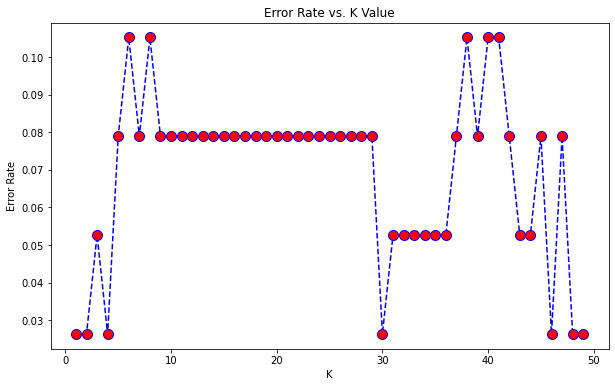

In [9]:
# 圖表: k值-錯誤率
plt.figure(figsize=(10, 6))
plt.plot(test_range, error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [10]:
error_rate.index(min(error_rate))

0

In [11]:
# test
[knnm, pred, er] = knnTest(2)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))

[[14  0]
 [ 1 23]]


In [12]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.96      0.98        24

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [13]:
pred = knnm.predict(df_feat.iloc[[0]])

In [14]:
pred[0]

1